<a href="https://colab.research.google.com/github/djsmacker01/House-Price-Prediction/blob/main/Copy_of_Nurudeen_Adedeji_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
"""from google.colab import files
train = files.upload()"""


Saving train.csv to train (1).csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [1]:
import numpy as np #linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


In [4]:
# import io
# data = pd.read_csv(io.BytesIO(train['train.csv']))
df= pd.read_csv("/content/drive/MyDrive/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#list out all the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
missing_val = df.isnull().sum()
missing_val

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
missing_values_sorted = missing_val.sort_values(ascending=False)

print("Columns with the most missing values:")
print(missing_values_sorted.head(60))

Columns with the most missing values:
PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition   

In [15]:
# df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [19]:
#Separate numercial and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [20]:
print(categorical_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [10]:
print(numerical_cols)


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [21]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
#imputer for numerical data (using Median)
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [13]:
#imputer for categorical data (using most frequent value)
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

In [14]:
#verify there are no more missing values
missing_val = df.isnull().sum()
missing_val

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [15]:
missing_values_sorted = missing_val.sort_values(ascending=False)

print("Columns with the most missing values:")
print(missing_values_sorted.head(60))

Columns with the most missing values:
Id               0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
HeatingQC        0
MSSubClass       0
Heating          0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope   

In [16]:
num_cols = len(categorical_cols)
print(num_cols)

43


In [17]:
num_rows = (num_cols + 2) // 3
print(num_rows)

15


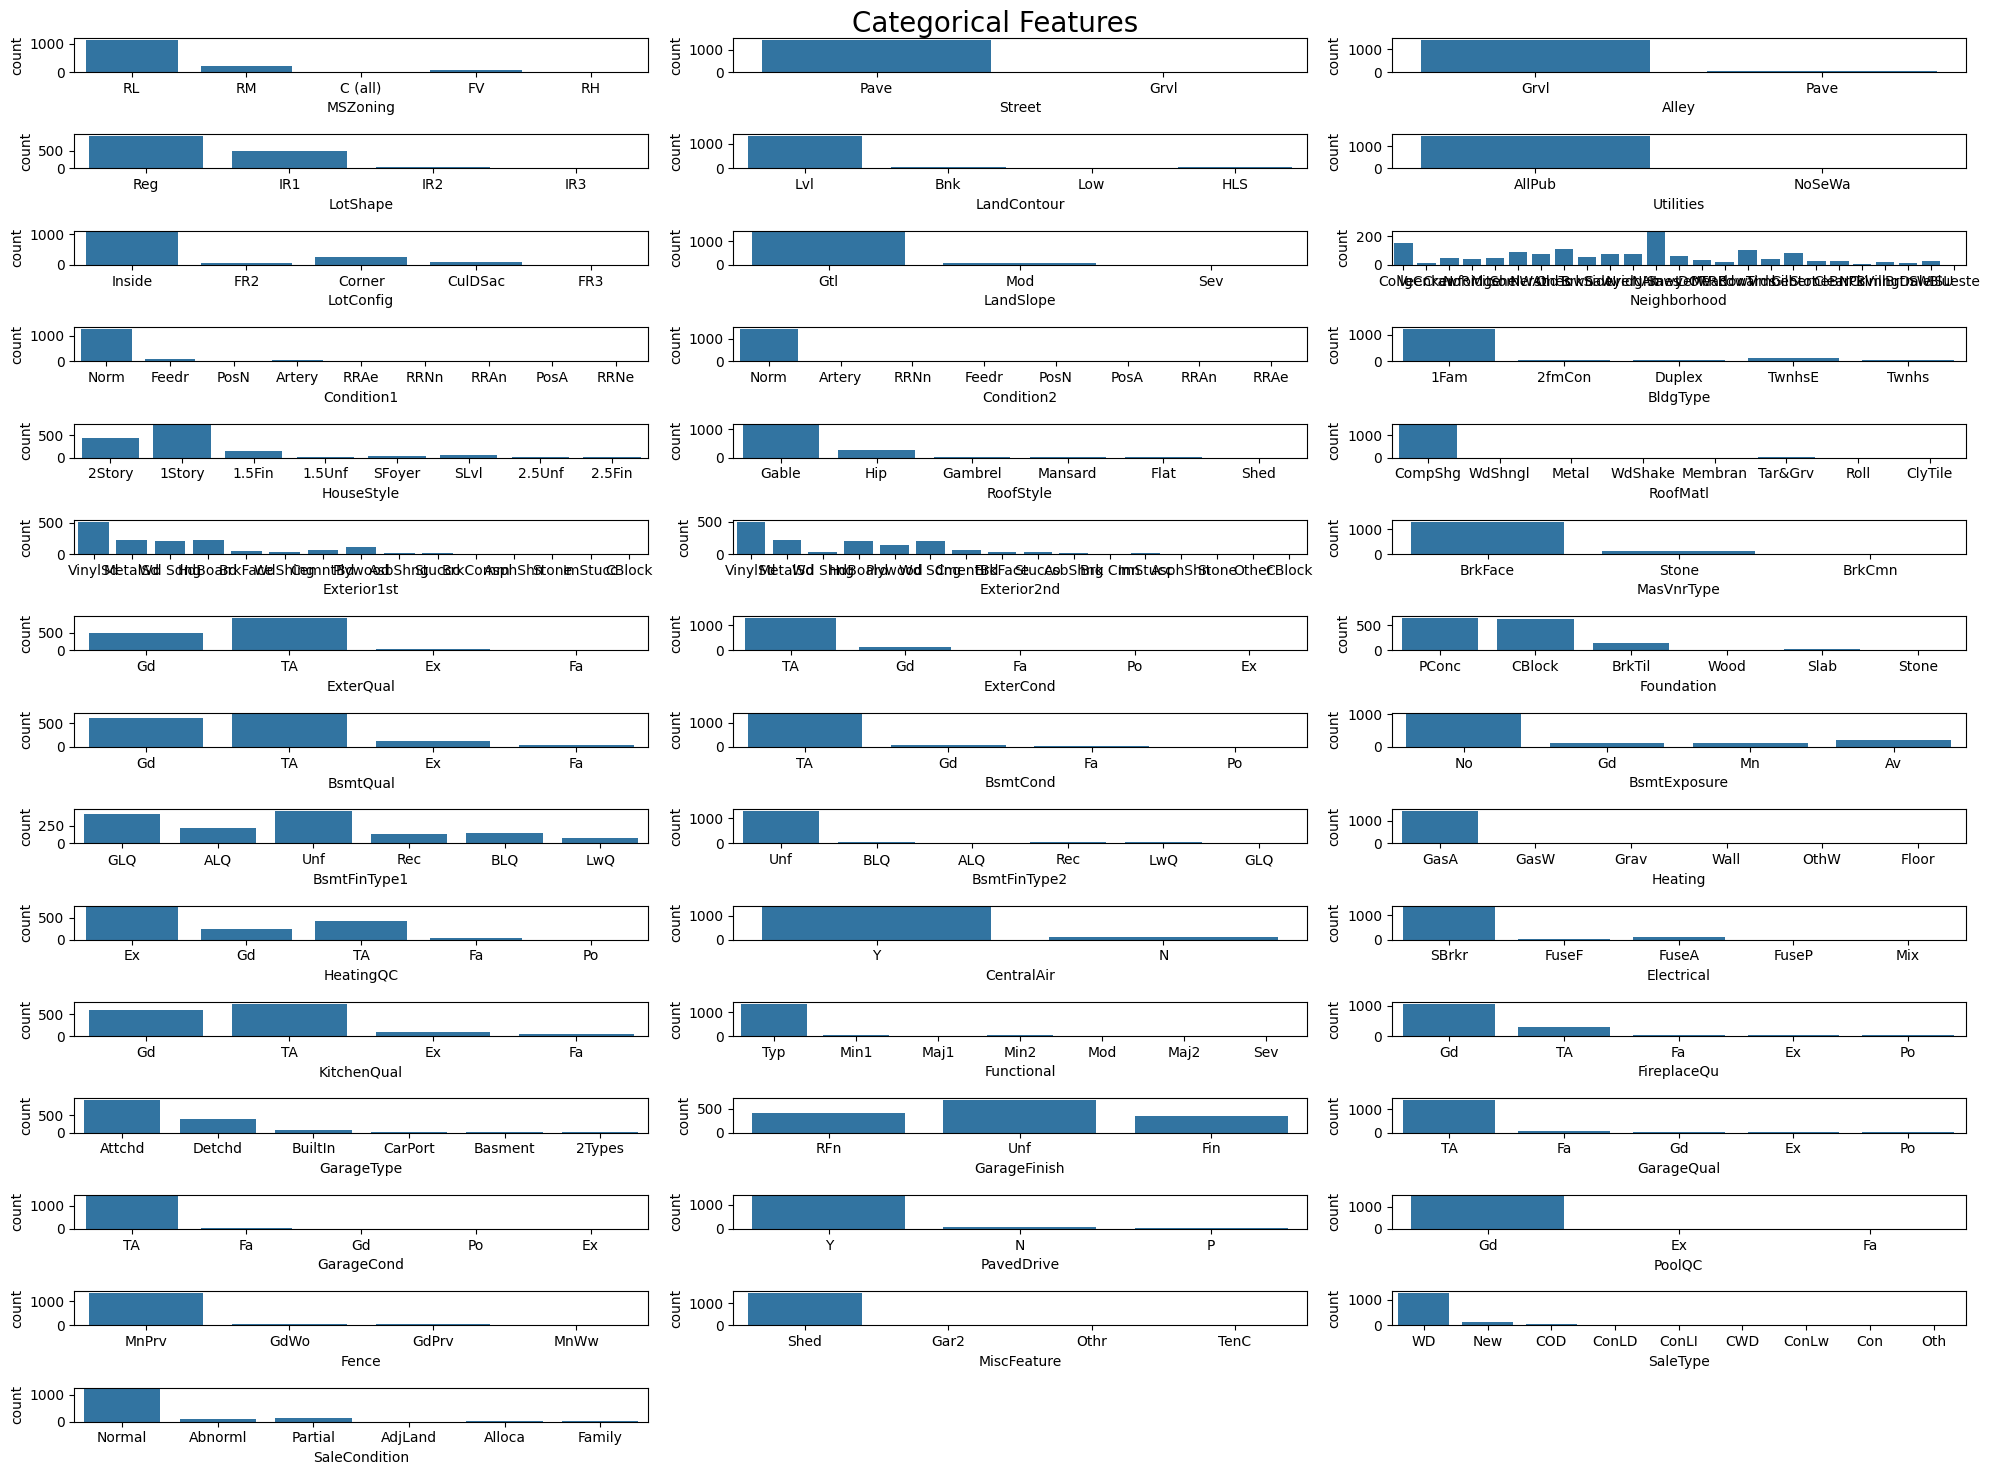

In [18]:
#Let's move to the next stage, which is EDA,
#Let' start with automatically drawing graphs from all categorical

num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
plt.figure(figsize=(20,15))
plt.suptitle('Categorical Features', fontsize=20)
for i in range(0, len(categorical_cols)):
    plt.subplot(num_rows, 3, i+1)
    sns.countplot(x=categorical_cols[i], data=df)
    plt.tight_layout()

<ipython-input-23-5c9d516a5073>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-23-5c9d516a5073>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-23-5c9d516a5073>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

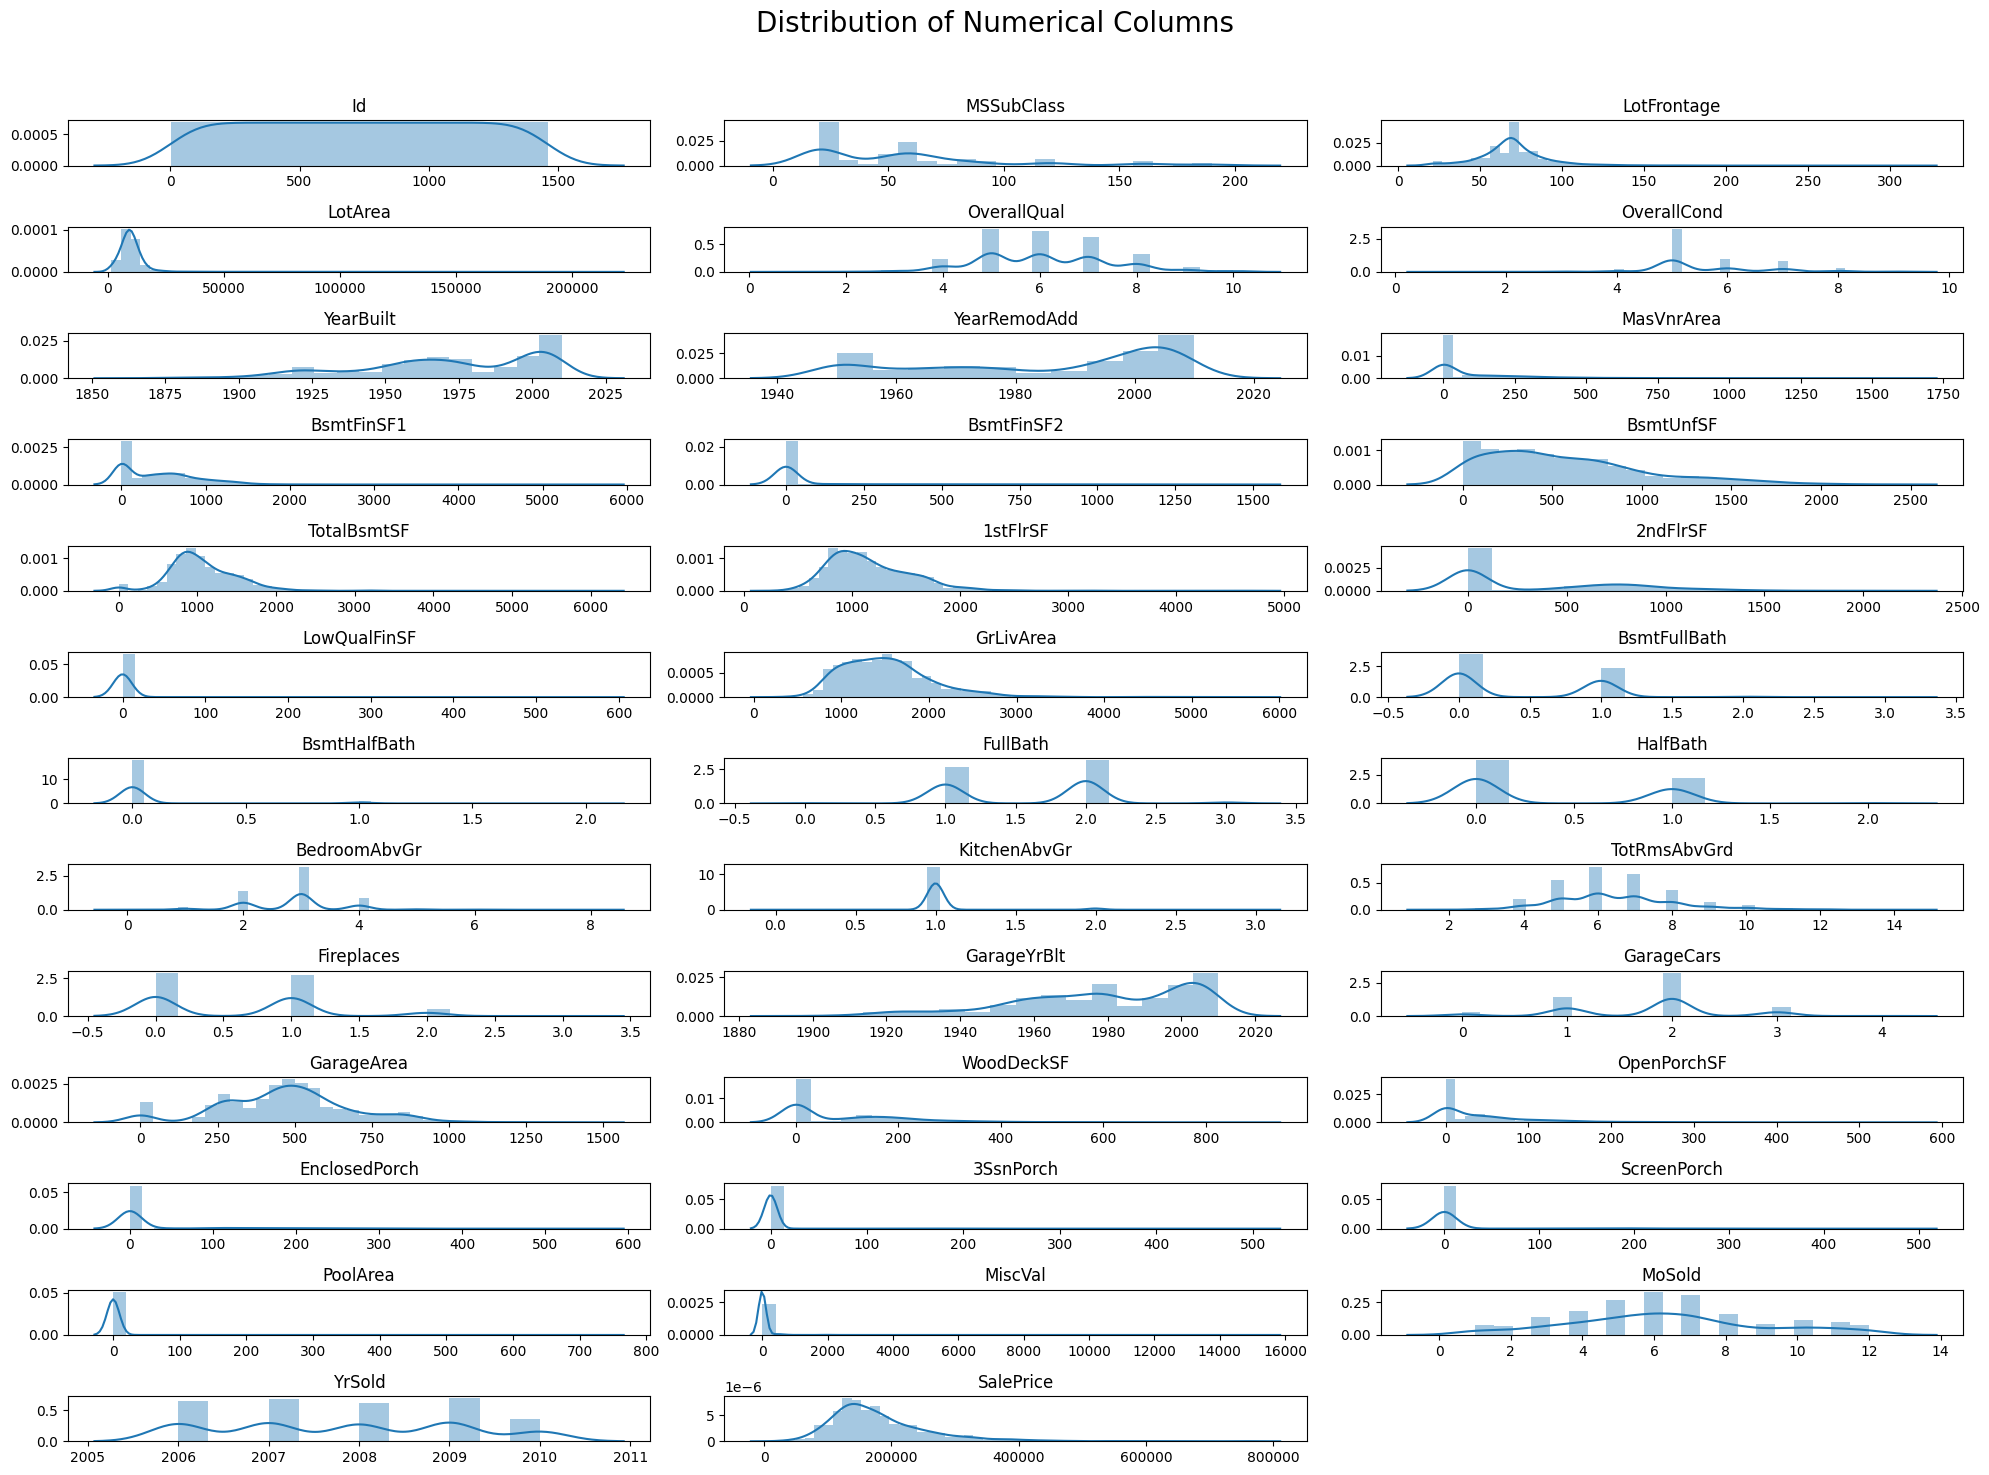

In [23]:
#Let's move to the next stage, which is EDA,
#Let' start with automatically drawing graphs from all numerical
plt.figure(figsize=(20,15))
plt.suptitle('Distribution of Numerical Columns', fontsize=20)

for i, col in enumerate(numerical_cols, 1):
  plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
  sns.distplot(df[col])
  plt.title(col)
  plt.xlabel('')
  plt.ylabel('')

plt.tight_layout(rect=[0,0,1, 0.96])
plt.show()

In [24]:
# total square footage of house (including basement)
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# total number of bathrooms (which includes full and half)
df['TotalBath'] = df["FullBath"] + (0.5 * df["HalfBath"]) + df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"])

#Age of the house at the time of sale
df['House'] = df["YrSold"] - df["YearBuilt"]

# Number of years since the house was remodeled
df['YearSinceRemodeled'] = df["YrSold"] - df["YearRemodAdd"]

In [25]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
df["YearSinceRemodeled"].head()

0     5.0
1    31.0
2     6.0
3    36.0
4     8.0
Name: YearSinceRemodeled, dtype: float64

# Encode categorical features using one-hot encoding or label encoding

In [27]:
# Assuming 'categorical_cols' is a list of column names, try this:
# df[categorical_cols].value_counts()

# Perform one-hot encoding
# df = pd.get_dummies(df, columns=categorical_cols)
# df = pd.get_dummies(df, columns=categorical_cols, dtype=int)
one_hot_encoded = pd.get_dummies(df[categorical_cols], dtype=int)

print(one_hot_encoded)

# print(df.head)

      MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                    0            0            0            1            0   
1                    0            0            0            1            0   
2                    0            0            0            1            0   
3                    0            0            0            1            0   
4                    0            0            0            1            0   
...                ...          ...          ...          ...          ...   
1455                 0            0            0            1            0   
1456                 0            0            0            1            0   
1457                 0            0            0            1            0   
1458                 0            0            0            1            0   
1459                 0            0            0            1            0   

      Street_Grvl  Street_Pave  Alley_Grvl  Alley_Pave  LotShap

In [28]:

#combining numerical columns and one-hot encoded columns(categorical columns)
final_df =pd.concat([df[numerical_cols], one_hot_encoded], axis=1)
print(final_df)

          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          8.0   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1455  1456.0        60.0         62.0   7917.0          6.0          5.0   
1456  1457.0        20.0         85.0  13175.0          6.0          6.0   
1457  1458.0        70.0         66.0   9042.0          7.0          9.0   
1458  1459.0        20.0         68.0   9717.0          5.0          6.0   
1459  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0        

In [29]:
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

Handle Outliers
> Identify and hanle outliers in numerical features

In [30]:
# df.select_dtypes(include=['object']).columns
#checking out outliers in our numerical columns
df.dtypes[df.dtypes != 'object']


Id                    float64
MSSubClass            float64
LotFrontage           float64
LotArea               float64
OverallQual           float64
OverallCond           float64
YearBuilt             float64
YearRemodAdd          float64
MasVnrArea            float64
BsmtFinSF1            float64
BsmtFinSF2            float64
BsmtUnfSF             float64
TotalBsmtSF           float64
1stFlrSF              float64
2ndFlrSF              float64
LowQualFinSF          float64
GrLivArea             float64
BsmtFullBath          float64
BsmtHalfBath          float64
FullBath              float64
HalfBath              float64
BedroomAbvGr          float64
KitchenAbvGr          float64
TotRmsAbvGrd          float64
Fireplaces            float64
GarageYrBlt           float64
GarageCars            float64
GarageArea            float64
WoodDeckSF            float64
OpenPorchSF           float64
EnclosedPorch         float64
3SsnPorch             float64
ScreenPorch           float64
PoolArea  

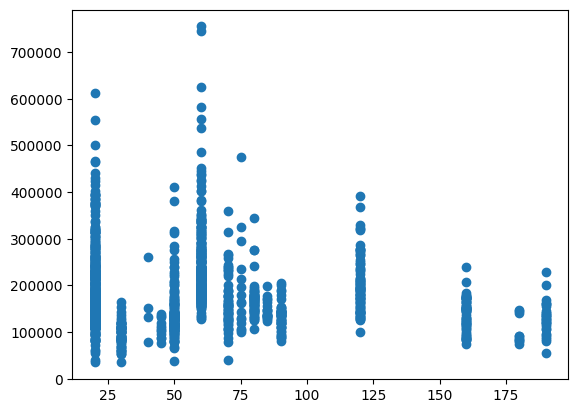

In [31]:
# Detecting outliers
plt.scatter(x='MSSubClass', y='SalePrice', data=df)

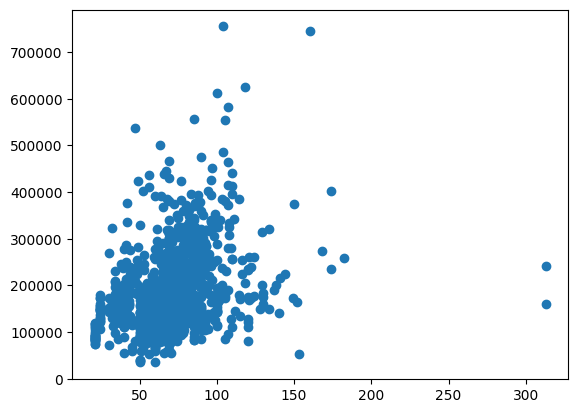

In [32]:
plt.scatter(x='LotFrontage', y='SalePrice', data=df)

In [33]:
df.query('LotFrontage > 300')
#Then drop id 935 and 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
934,935.0,20.0,RL,313.0,27650.0,Pave,Grvl,IR2,HLS,AllPub,...,0.0,11.0,2008.0,WD,Normal,242000.0,2654.0,3.0,48.0,1.0
1298,1299.0,60.0,RL,313.0,63887.0,Pave,Grvl,IR3,Bnk,AllPub,...,0.0,1.0,2008.0,New,Partial,160000.0,11752.0,4.5,0.0,0.0


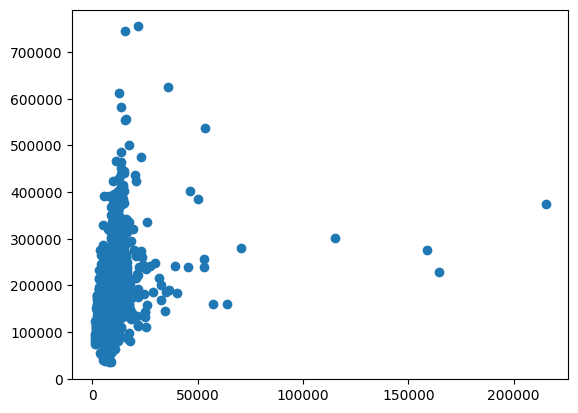

In [34]:
plt.scatter(x='LotArea', y='SalePrice', data=df)

In [35]:
df.query('LotArea > 60000')
#then i need to drop 250,314,336 and 707

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
249,250.0,50.0,RL,69.0,159000.0,Pave,Grvl,IR2,Low,AllPub,...,500.0,6.0,2007.0,WD,Normal,277000.0,3588.0,2.5,49.0,1.0
313,314.0,20.0,RL,150.0,215245.0,Pave,Grvl,IR3,Low,AllPub,...,0.0,6.0,2009.0,WD,Normal,375000.0,4172.0,4.0,44.0,44.0
335,336.0,190.0,RL,69.0,164660.0,Grvl,Grvl,IR1,HLS,AllPub,...,700.0,8.0,2008.0,WD,Normal,228950.0,3285.0,4.0,43.0,43.0
451,452.0,20.0,RL,62.0,70761.0,Pave,Grvl,IR1,Low,AllPub,...,0.0,12.0,2006.0,WD,Normal,280000.0,3066.0,3.0,31.0,31.0
706,707.0,20.0,RL,69.0,115149.0,Pave,Grvl,IR2,Low,AllPub,...,0.0,6.0,2007.0,WD,Normal,302000.0,3467.0,3.0,36.0,5.0
1298,1299.0,60.0,RL,313.0,63887.0,Pave,Grvl,IR3,Bnk,AllPub,...,0.0,1.0,2008.0,New,Partial,160000.0,11752.0,4.5,0.0,0.0


In [36]:
stats.zscore(df['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

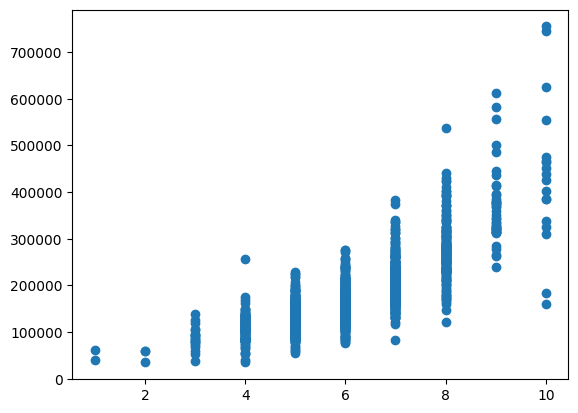

In [37]:
plt.scatter(x='OverallQual', y='SalePrice', data=df)

In [38]:
df.query('OverallQual == 10')
#we can drop 524 and 1299 cos the house price falls

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
58,59.0,60.0,RL,66.0,13682.0,Pave,Grvl,IR2,HLS,AllPub,...,0.0,10.0,2006.0,New,Partial,438780.0,4355.0,3.5,0.0,0.0
185,186.0,75.0,RM,90.0,22950.0,Pave,Grvl,IR2,Lvl,AllPub,...,0.0,6.0,2006.0,WD,Normal,475000.0,4143.0,2.5,114.0,13.0
224,225.0,20.0,RL,103.0,13472.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,6.0,2009.0,WD,Normal,386250.0,4784.0,2.0,6.0,6.0
389,390.0,60.0,RL,96.0,12474.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,8.0,2008.0,New,Partial,426000.0,4014.0,3.5,1.0,0.0
440,441.0,20.0,RL,105.0,15431.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,4.0,2009.0,WD,Normal,555000.0,5496.0,3.0,1.0,1.0
515,516.0,20.0,RL,94.0,12220.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,9.0,2009.0,New,Partial,402861.0,4026.0,3.5,0.0,0.0
523,524.0,60.0,RL,130.0,40094.0,Pave,Grvl,IR1,Bnk,AllPub,...,0.0,10.0,2007.0,New,Partial,184750.0,7814.0,4.5,0.0,-1.0
583,584.0,75.0,RM,75.0,13500.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,7.0,2008.0,WD,Normal,325000.0,4012.0,3.5,115.0,8.0
591,592.0,60.0,RL,97.0,13478.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,6.0,2009.0,ConLI,Normal,451950.0,4018.0,3.5,1.0,1.0
691,692.0,60.0,RL,104.0,21535.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,1.0,2007.0,WD,Normal,755000.0,6760.0,4.0,13.0,12.0


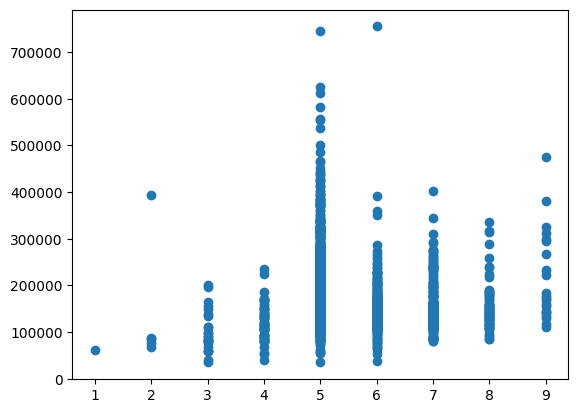

In [39]:
plt.scatter(x='OverallCond', y='SalePrice', data=df)

In [40]:
df.query('OverallCond == 2')
#then we drop 379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
88,89.0,50.0,C (all),105.0,8470.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,10.0,2009.0,ConLD,Abnorml,85000.0,2026.0,1.0,94.0,27.0
250,251.0,30.0,RL,55.0,5350.0,Pave,Grvl,IR1,Lvl,AllPub,...,450.0,5.0,2010.0,WD,Normal,76500.0,2034.0,1.0,70.0,44.0
378,379.0,20.0,RL,88.0,11394.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,6.0,2010.0,New,Partial,394432.0,3712.0,2.5,0.0,0.0
398,399.0,30.0,RM,60.0,8967.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,11.0,2007.0,WD,Abnorml,67000.0,2038.0,1.0,87.0,57.0
676,677.0,70.0,RM,60.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,5.0,2006.0,WD,Normal,87000.0,2869.0,3.0,106.0,56.0


In [41]:
df.query('OverallCond == 5 & SalePrice > 700000')
# We need to drop 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
1182,1183.0,60.0,RL,160.0,15623.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,7.0,2007.0,WD,Abnorml,745000.0,6872.0,4.5,11.0,11.0


In [42]:
df.query('OverallCond == 6 & SalePrice > 700000')
# drop 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
691,692.0,60.0,RL,104.0,21535.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,1.0,2007.0,WD,Normal,755000.0,6760.0,4.0,13.0,12.0


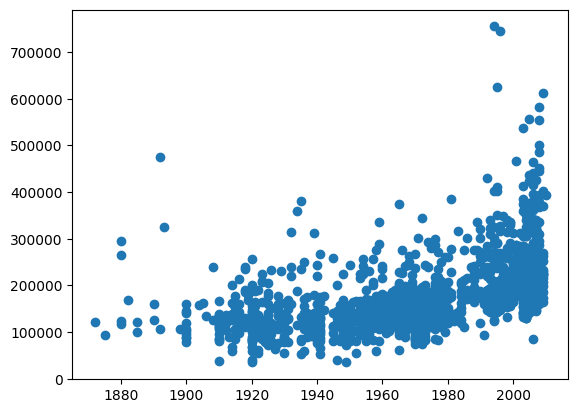

In [43]:
plt.scatter(x='YearBuilt', y='SalePrice', data=df)

In [44]:
df.query('YearBuilt < 1900 & SalePrice > 380000')
#drop 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
185,186.0,75.0,RM,90.0,22950.0,Pave,Grvl,IR2,Lvl,AllPub,...,0.0,6.0,2006.0,WD,Normal,475000.0,4143.0,2.5,114.0,13.0


In [45]:
df.query('YearBuilt < 2000 & SalePrice > 700000')
#we might need to drop 692 and 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
691,692.0,60.0,RL,104.0,21535.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,1.0,2007.0,WD,Normal,755000.0,6760.0,4.0,13.0,12.0
1182,1183.0,60.0,RL,160.0,15623.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,7.0,2007.0,WD,Abnorml,745000.0,6872.0,4.5,11.0,11.0


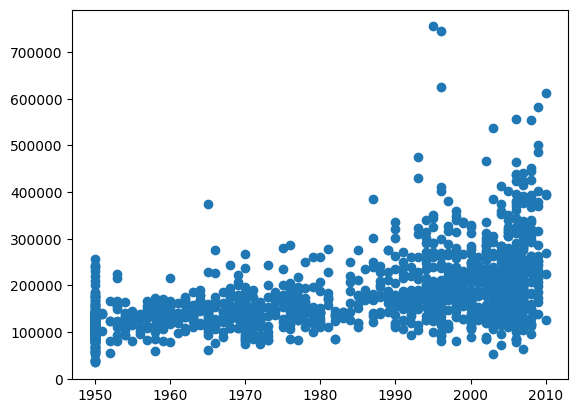

In [46]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=df)

In [47]:
df.query('YearRemodAdd < 1970 & SalePrice > 300000')
#drop 314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
313,314.0,20.0,RL,150.0,215245.0,Pave,Grvl,IR3,Low,AllPub,...,0.0,6.0,2009.0,WD,Normal,375000.0,4172.0,4.0,44.0,44.0


In [48]:
df.query('YearRemodAdd < 2000 & SalePrice > 700000')
#drop 692 and 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
691,692.0,60.0,RL,104.0,21535.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,1.0,2007.0,WD,Normal,755000.0,6760.0,4.0,13.0,12.0
1182,1183.0,60.0,RL,160.0,15623.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,7.0,2007.0,WD,Abnorml,745000.0,6872.0,4.5,11.0,11.0


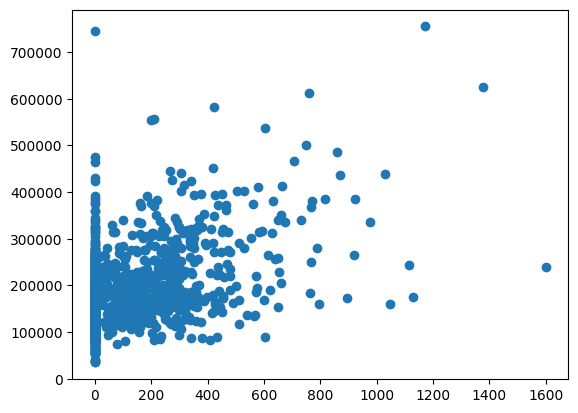

In [49]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=df)

In [50]:
df.query('MasVnrArea > 1500 ')
#drop 298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
297,298.0,60.0,FV,66.0,7399.0,Pave,Pave,IR1,Lvl,AllPub,...,0.0,6.0,2007.0,WD,Normal,239000.0,2925.0,2.5,10.0,9.0


In [51]:
df.query('MasVnrArea < 200 & SalePrice > 550000')
#drop 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
1182,1183.0,60.0,RL,160.0,15623.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,7.0,2007.0,WD,Abnorml,745000.0,6872.0,4.5,11.0,11.0


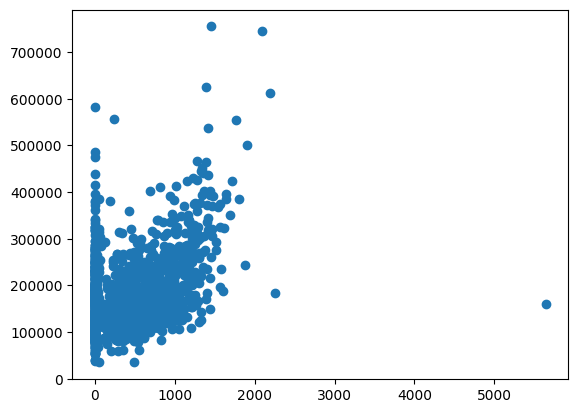

In [52]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=df)

In [53]:
df.query('BsmtFinSF1 > 5000')
#drop 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
1298,1299.0,60.0,RL,313.0,63887.0,Pave,Grvl,IR3,Bnk,AllPub,...,0.0,1.0,2008.0,New,Partial,160000.0,11752.0,4.5,0.0,0.0


In [54]:
df.query('BsmtFinSF1 < 3000 & SalePrice > 700000')
#drop 692 and 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
691,692.0,60.0,RL,104.0,21535.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,1.0,2007.0,WD,Normal,755000.0,6760.0,4.0,13.0,12.0
1182,1183.0,60.0,RL,160.0,15623.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,7.0,2007.0,WD,Abnorml,745000.0,6872.0,4.5,11.0,11.0


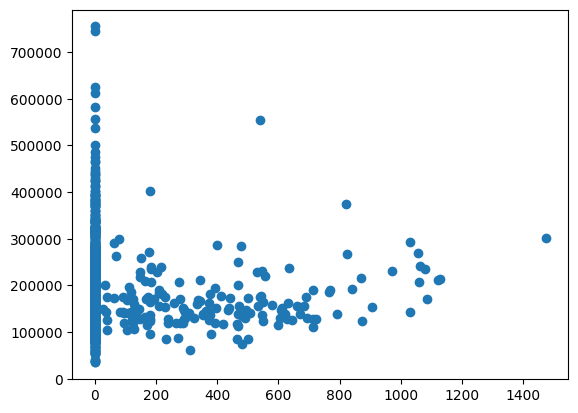

In [55]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=df)

In [56]:
df.query('BsmtFinSF2 > 400 & SalePrice > 500000')
#drop 441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
440,441.0,20.0,RL,105.0,15431.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,4.0,2009.0,WD,Normal,555000.0,5496.0,3.0,1.0,1.0


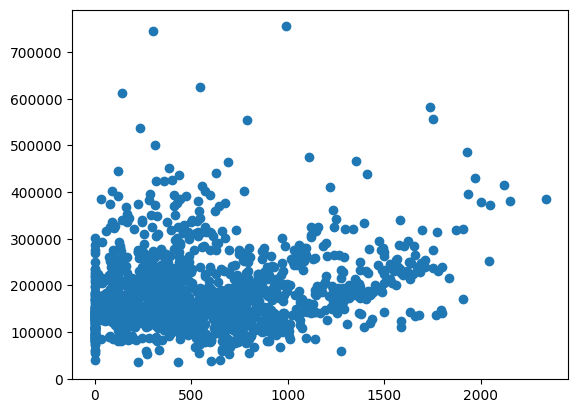

In [57]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=df)

In [58]:
df.query('BsmtUnfSF > 1500 & SalePrice > 650000')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled


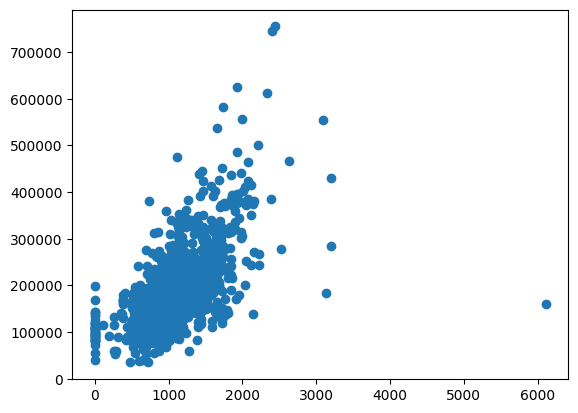

In [59]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=df)

In [60]:
df.query('TotalBsmtSF > 5000')
#drop 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
1298,1299.0,60.0,RL,313.0,63887.0,Pave,Grvl,IR3,Bnk,AllPub,...,0.0,1.0,2008.0,New,Partial,160000.0,11752.0,4.5,0.0,0.0


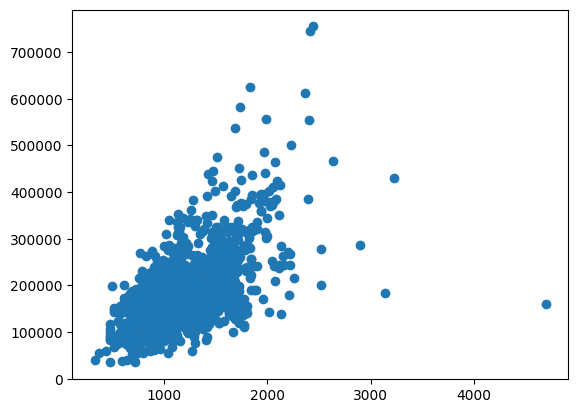

In [72]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=df)

In [74]:
df.query('`1stFlrSF` > 4000')
#drop 1299


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
1298,1299.0,60.0,RL,313.0,63887.0,Pave,Grvl,IR3,Bnk,AllPub,...,0.0,1.0,2008.0,New,Partial,160000.0,11752.0,4.5,0.0,0.0


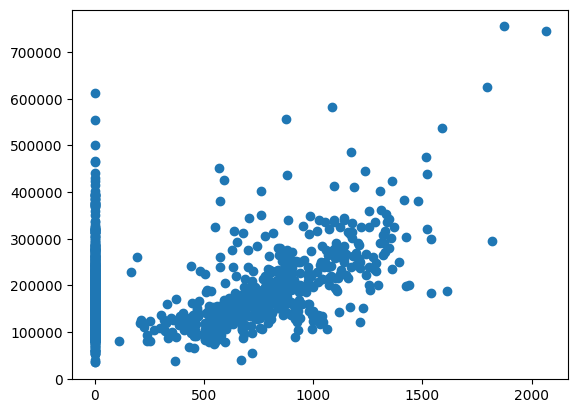

In [76]:
plt.scatter(x='2ndFlrSF', y = 'SalePrice', data=df)

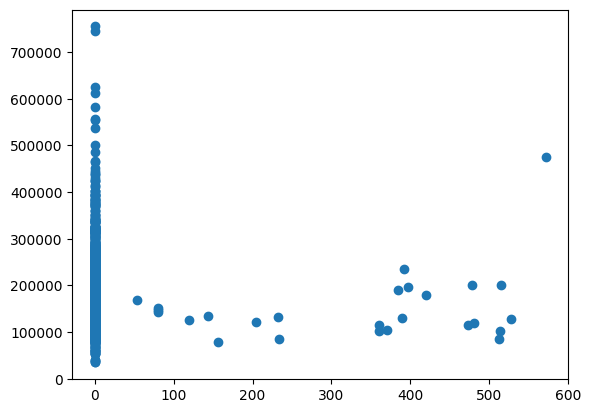

In [77]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=df)
#drop

In [79]:
df.query('LowQualFinSF > 500 & SalePrice > 40000 ')
#drop 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
88,89.0,50.0,C (all),105.0,8470.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,10.0,2009.0,ConLD,Abnorml,85000.0,2026.0,1.0,94.0,27.0
170,171.0,50.0,RM,69.0,12358.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,5.0,2007.0,WD,Normal,128500.0,1574.0,1.5,66.0,57.0
185,186.0,75.0,RM,90.0,22950.0,Pave,Grvl,IR2,Lvl,AllPub,...,0.0,6.0,2006.0,WD,Normal,475000.0,4143.0,2.5,114.0,13.0
635,636.0,190.0,RH,60.0,10896.0,Pave,Pave,Reg,Bnk,AllPub,...,0.0,3.0,2007.0,WD,Abnorml,200000.0,4320.0,2.0,93.0,12.0
1009,1010.0,50.0,RL,60.0,6000.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,6.0,2006.0,WD,Normal,102000.0,2016.0,2.0,80.0,56.0


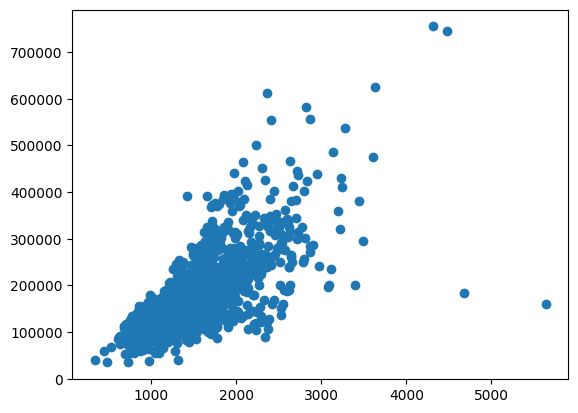

In [80]:
plt.scatter(x='GrLivArea', y='SalePrice', data=df)

In [81]:
df.query('GrLivArea > 4000')
#drop 524 and 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
523,524.0,60.0,RL,130.0,40094.0,Pave,Grvl,IR1,Bnk,AllPub,...,0.0,10.0,2007.0,New,Partial,184750.0,7814.0,4.5,0.0,-1.0
691,692.0,60.0,RL,104.0,21535.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,1.0,2007.0,WD,Normal,755000.0,6760.0,4.0,13.0,12.0
1182,1183.0,60.0,RL,160.0,15623.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,7.0,2007.0,WD,Abnorml,745000.0,6872.0,4.5,11.0,11.0
1298,1299.0,60.0,RL,313.0,63887.0,Pave,Grvl,IR3,Bnk,AllPub,...,0.0,1.0,2008.0,New,Partial,160000.0,11752.0,4.5,0.0,0.0


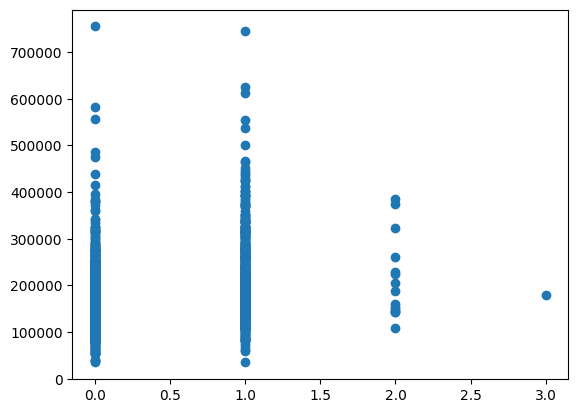

In [82]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=df)

In [83]:
df.query('BsmtFullBath > 2.5')
#drop 739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
738,739.0,90.0,RL,60.0,10800.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,3.0,2009.0,WD,Alloca,179000.0,2400.0,6.0,22.0,21.0


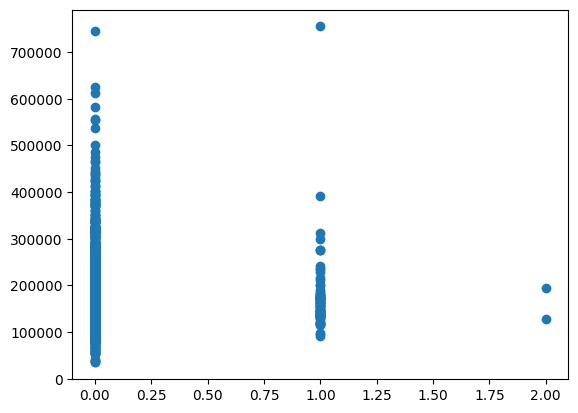

In [84]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=df)

In [86]:
stats.zscore(df['BsmtHalfBath']).sort_values().tail(20)

176     3.948809
931     3.948809
1276    3.948809
658     3.948809
414     3.948809
251     3.948809
330     3.948809
1389    3.948809
1118    3.948809
421     3.948809
245     3.948809
558     3.948809
1123    3.948809
1287    3.948809
426     3.948809
1006    3.948809
249     3.948809
358     3.948809
597     8.138680
954     8.138680
Name: BsmtHalfBath, dtype: float64

In [87]:
stats.zscore(df['BsmtHalfBath']).unique()

array([-0.24106104,  3.94880935,  8.13867973])

In [88]:
df.query('BsmtHalfBath == 2')
#drop 598 and 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
597,598.0,120.0,RL,53.0,3922.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,2.0,2007.0,New,Partial,194201.0,2660.0,2.0,1.0,0.0
954,955.0,90.0,RL,35.0,9400.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,10.0,2006.0,WD,AdjLand,127500.0,1925.0,3.0,31.0,31.0


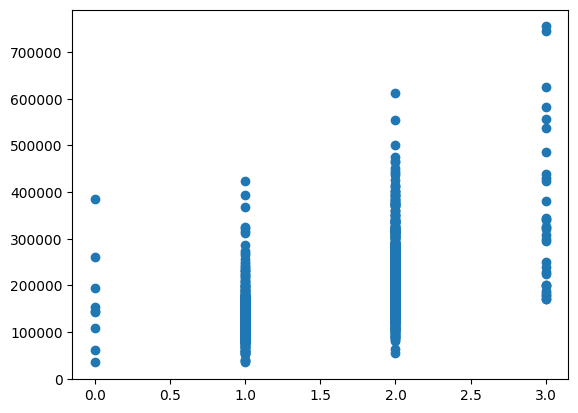

In [89]:
plt.scatter(x='FullBath', y='SalePrice', data=df)

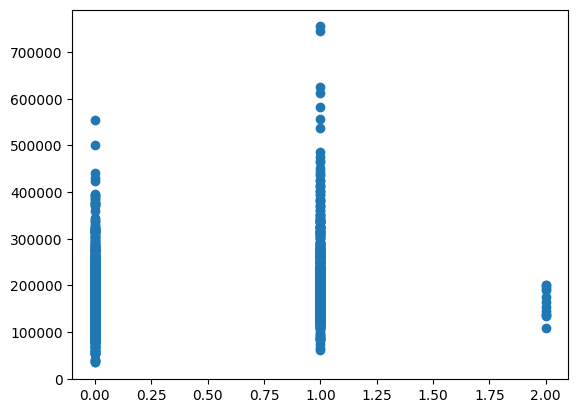

In [90]:
plt.scatter(x='HalfBath', y='SalePrice', data=df)

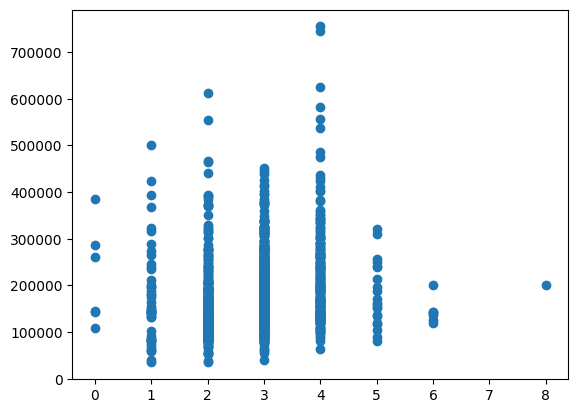

In [93]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=df)

In [94]:
df.query('BedroomAbvGr > 7')
#drop 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
635,636.0,190.0,RH,60.0,10896.0,Pave,Pave,Reg,Bnk,AllPub,...,0.0,3.0,2007.0,WD,Abnorml,200000.0,4320.0,2.0,93.0,12.0


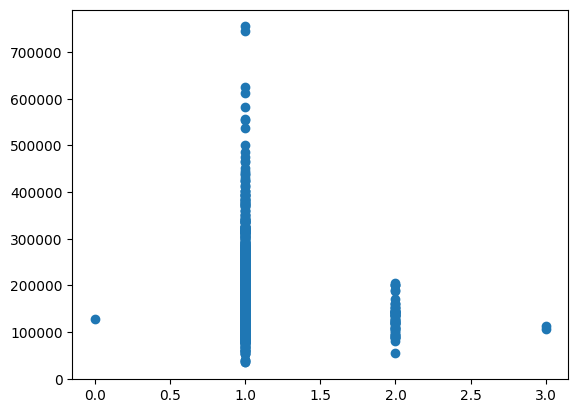

In [95]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=df)

In [100]:
df.query('KitchenAbvGr == 3')
#drop 49, 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
48,49.0,190.0,RM,33.0,4456.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,6.0,2009.0,New,Partial,113000.0,2188.0,2.0,89.0,1.0
809,810.0,75.0,RM,90.0,8100.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,11.0,2009.0,WD,Normal,106000.0,2987.0,2.0,111.0,44.0


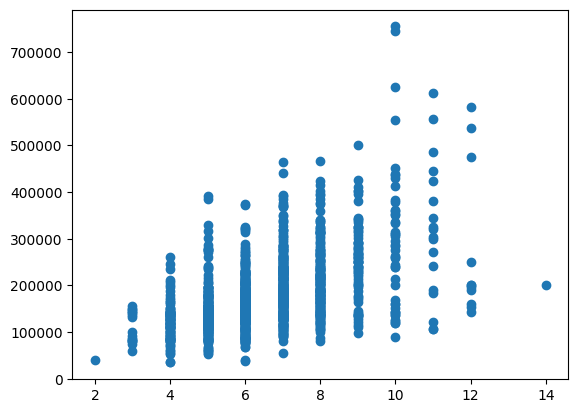

In [101]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=df)

In [111]:
df.query('TotRmsAbvGrd == 14')
#drop 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
635,636.0,190.0,RH,60.0,10896.0,Pave,Pave,Reg,Bnk,AllPub,...,0.0,3.0,2007.0,WD,Abnorml,200000.0,4320.0,2.0,93.0,12.0


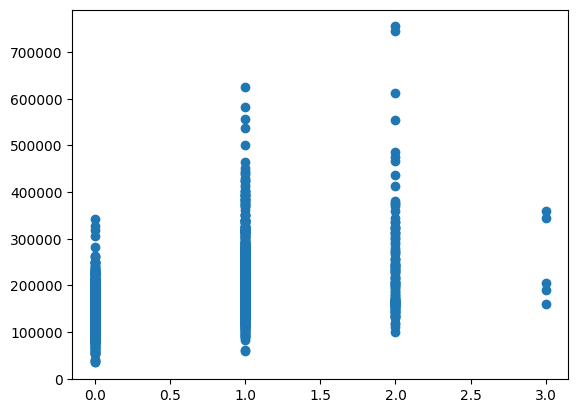

In [103]:
plt.scatter(x='Fireplaces', y='SalePrice', data=df)

In [115]:
df.query('Fireplaces == 3')
#drop 167, 310, 606, 643, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
166,167.0,20.0,RL,69.0,10708.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,11.0,2009.0,COD,Normal,190000.0,3484.0,2.0,54.0,16.0
309,310.0,20.0,RL,90.0,12378.0,Pave,Grvl,IR1,Lvl,AllPub,...,0.0,11.0,2006.0,WD,Normal,360000.0,3840.0,3.0,3.0,2.0
605,606.0,60.0,RL,85.0,13600.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,10.0,2009.0,WD,Normal,205000.0,2754.0,2.5,44.0,19.0
642,643.0,80.0,RL,75.0,13860.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,7.0,2009.0,WD,Normal,345000.0,4656.0,3.5,37.0,14.0
1298,1299.0,60.0,RL,313.0,63887.0,Pave,Grvl,IR3,Bnk,AllPub,...,0.0,1.0,2008.0,New,Partial,160000.0,11752.0,4.5,0.0,0.0


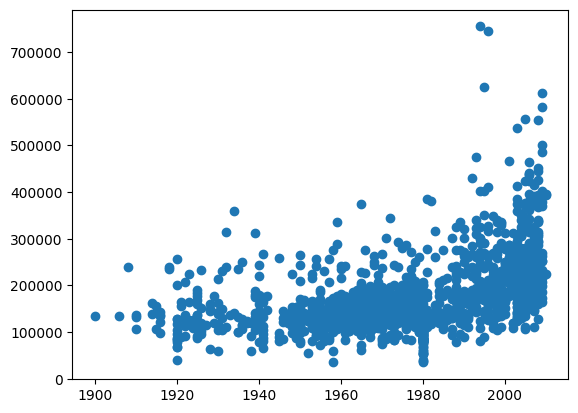

In [118]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=df)

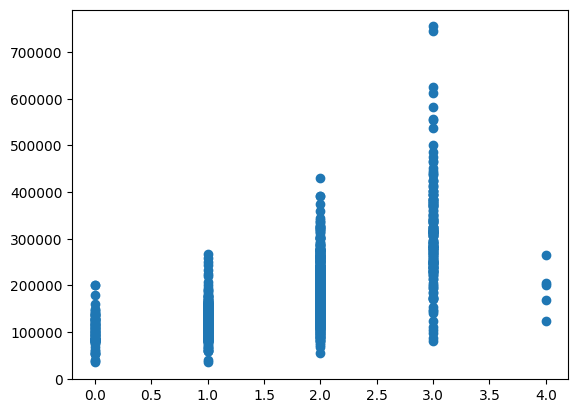

In [104]:
plt.scatter(x='GarageCars', y='SalePrice', data=df)

In [117]:
df.query('GarageCars == 4')
#drop 421, 748, 1191,1341,1351

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
420,421.0,90.0,RM,78.0,7060.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,11.0,2008.0,WD,Alloca,206300.0,2688.0,4.0,11.0,10.0
747,748.0,70.0,RM,65.0,11700.0,Pave,Pave,IR1,Lvl,AllPub,...,0.0,5.0,2009.0,WD,Normal,265979.0,3880.0,1.5,129.0,6.0
1190,1191.0,190.0,RL,69.0,32463.0,Pave,Grvl,Reg,Low,AllPub,...,0.0,3.0,2007.0,WD,Normal,168000.0,2871.0,2.0,46.0,32.0
1340,1341.0,20.0,RL,70.0,8294.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,6.0,2007.0,WD,Normal,123000.0,1730.0,1.0,36.0,36.0
1350,1351.0,90.0,RL,91.0,11643.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,8.0,2009.0,WD,Normal,200000.0,3882.0,4.5,40.0,40.0


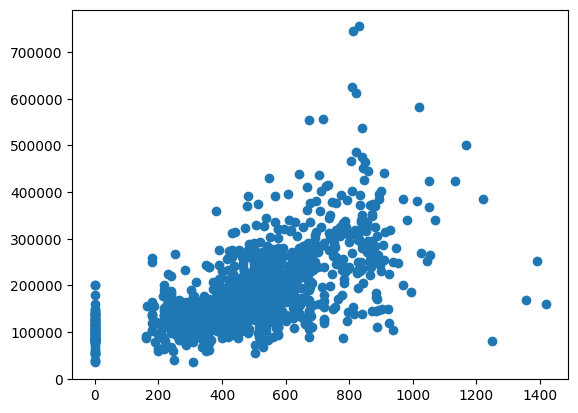

In [105]:
plt.scatter(x='GarageArea', y='SalePrice', data=df)

In [119]:
df.query('GarageArea > 1200')
#drop 1062, 1191

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
581,582.0,20.0,RL,98.0,12704.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,8.0,2009.0,New,Partial,253293.0,4084.0,2.5,1.0,0.0
825,826.0,20.0,RL,114.0,14803.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,6.0,2008.0,New,Partial,385000.0,4162.0,3.0,1.0,0.0
1061,1062.0,30.0,C (all),120.0,18000.0,Grvl,Grvl,Reg,Low,AllPub,...,560.0,8.0,2008.0,ConLD,Normal,81000.0,1788.0,1.0,73.0,58.0
1190,1191.0,190.0,RL,69.0,32463.0,Pave,Grvl,Reg,Low,AllPub,...,0.0,3.0,2007.0,WD,Normal,168000.0,2871.0,2.0,46.0,32.0
1298,1299.0,60.0,RL,313.0,63887.0,Pave,Grvl,IR3,Bnk,AllPub,...,0.0,1.0,2008.0,New,Partial,160000.0,11752.0,4.5,0.0,0.0


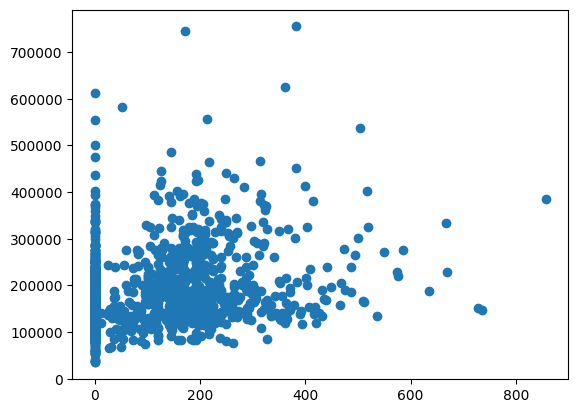

In [106]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=df)

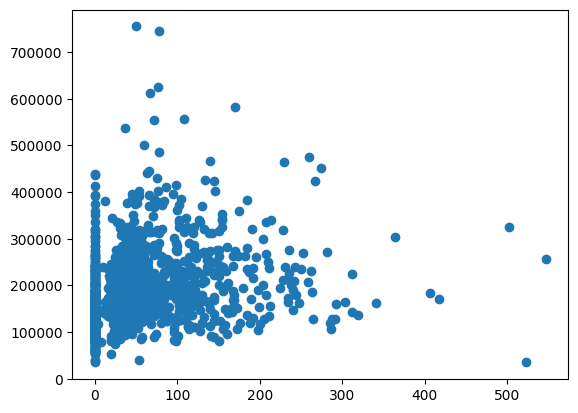

In [107]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=df)

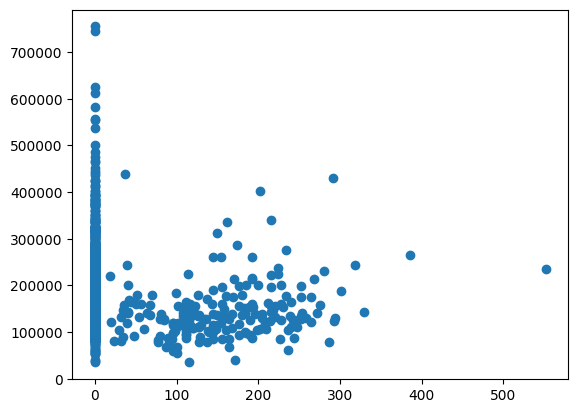

In [108]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=df)

In [109]:
df.query('EnclosedPorch > 500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,House,YearSinceRemodeled
197,198.0,75.0,RL,174.0,25419.0,Pave,Grvl,Reg,Lvl,AllPub,...,0.0,3.0,2006.0,WD,Abnorml,235000.0,4080.0,3.5,88.0,16.0


In [238]:
#using Z Score Test
# z score = (x - mean)/std.deviation
import pandas as pd
from scipy.stats import zscore

final_df = pd.DataFrame({"data": [1, 2, 3, 4, 5]})
z_scores = zscore(final_df["data"])
print(z_scores)

0   -1.414214
1   -0.707107
2    0.000000
3    0.707107
4    1.414214
Name: data, dtype: float64


Perform Feature scaling
> Do this by Standardizing or Normalizing

Feature Selection
> Select features that are most relevant for the prediction

Train model

Evaluate the model